In [0]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
import statsmodels.api as sm
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.neural_network import MLPClassifier
import warnings

/usr/local/lib/python3.6/dist-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


# **Importing all important libraries**

In [0]:
warnings.filterwarnings("ignore")

## **Loading the Data**

In [0]:
final_challenge  = pd.read_csv('FinalChallenge.csv')
final_challenge.head()

FileNotFoundError: ignored

## **Descriptive Statistics of Data**

In [0]:
final_challenge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159596 entries, 0 to 159595
Data columns (total 28 columns):
loanId                       159596 non-null object
clientIncome                 159596 non-null float64
incomeVerified               159596 non-null object
clientAge                    159596 non-null int64
clientGender                 159596 non-null object
clientMaritalStatus          159596 non-null object
clientstate                  159596 non-null object
clientTimeAtEmployer         159596 non-null object
clientNumberPhoneContacts    159596 non-null object
clientAvgCallsPerDay         159596 non-null object
loanType                     159596 non-null object
loanNumber                   159596 non-null int64
applicationDate              159596 non-null object
approvalDate                 159596 non-null object
declinedDate                 159596 non-null object
disbursementDate             159596 non-null object
payout_status                159596 non-null object
loanAm

In [0]:
final_challenge.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
clientIncome,159596.0,90839.055766,97280.332866,30.0,35000.0,55116.21,105000.0,3925000.0
clientAge,159596.0,33.691847,7.180870,18.0,28.0,33.00,38.0,138.0
loanNumber,159596.0,3.556806,2.471578,1.0,2.0,3.00,4.0,32.0
loanAmount,159596.0,35324.184190,27840.824297,11000.0,20000.0,25500.00,37500.0,500000.0
interestRate,159596.0,13.331235,4.467938,4.5,10.0,12.50,15.0,20.0
loanTerm,159596.0,85.385599,39.323756,60.0,60.0,60.00,90.0,180.0
max_amount_taken,159596.0,0.705275,0.455921,0.0,0.0,1.00,1.0,1.0
max_tenor_taken,159596.0,0.915374,0.278325,0.0,1.0,1.00,1.0,1.0
settleDays,159596.0,32.602127,84.552571,-32.0,-2.0,0.00,13.0,386.0
firstPaymentRatio,159596.0,0.097991,0.278058,0.0,0.0,0.00,0.0,1.0


In [0]:
final_challenge.shape

(159596, 28)

# **copying the data for Exploratory Analysis**



In [0]:
EDA_data = final_challenge.copy()

### **Univariate Analysis**
Univariate analysis is the simplest form of analyzing data where we examine each variable individually. 

We will first look at the target variable, i.e., loanDefault. As it is a categorical variable, let us look at its frequency table, percentage distribution and bar plot.

In [0]:
EDA_data['loanDefault'].value_counts(normalize = True)

0    0.906827
1    0.093173
Name: loanDefault, dtype: float64

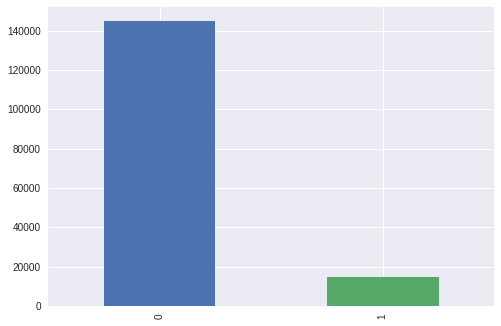

In [0]:
#@title The loan of 14870(around 9.3%) people out of 159596 was approved.
EDA_data['loanDefault'].value_counts().plot.bar()

**We also visualize each variable seperately**

Independent variable (**Categorical**)
categorical variables are Gender, Marrital Status, State.


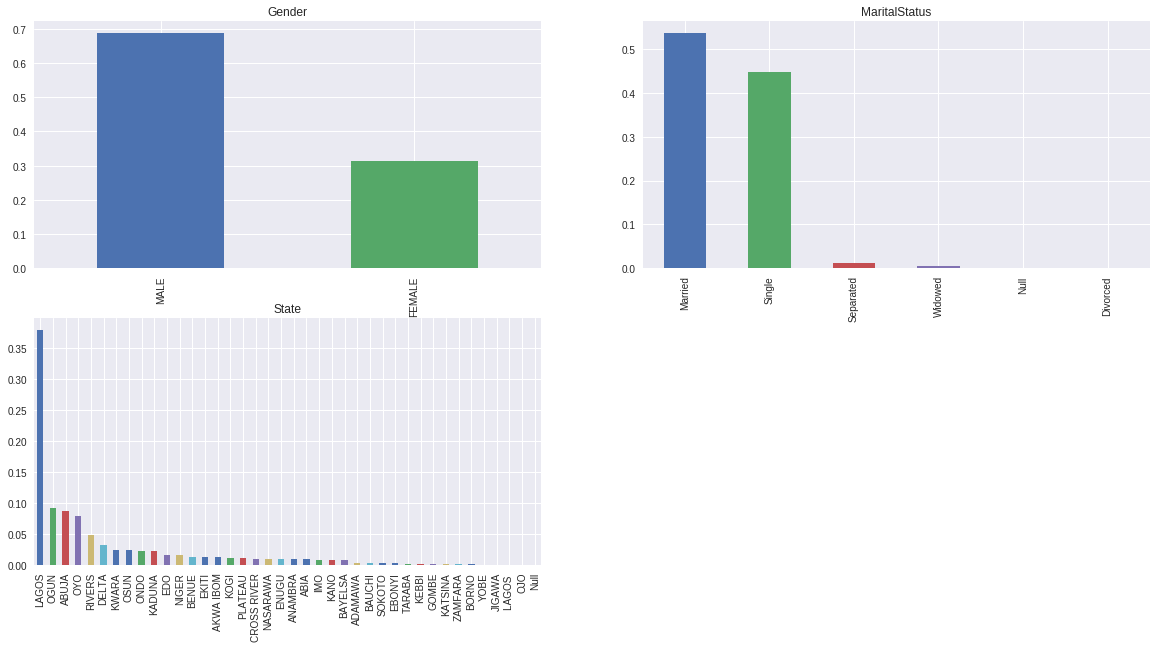

In [0]:
plt.figure(1)
plt.subplot(221)
EDA_data['clientGender'].value_counts(normalize = True).plot.bar(figsize = (20,10), title = 'Gender')
plt.subplot(222)
EDA_data['clientMaritalStatus'].value_counts(normalize = True).plot.bar(figsize = (20,10), title = 'MaritalStatus')
plt.subplot(223)
EDA_data['clientstate'].value_counts(normalize = True).plot.bar(figsize = (20,10), title = 'State')
plt.show()

It can be inferred from the above bar plots that:

70% applicants in the dataset are male.
Around 55% of the applicants in the dataset are married.
Around 40% applicants are in Lagos state.

## Independent Variable (**Numerical**)

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


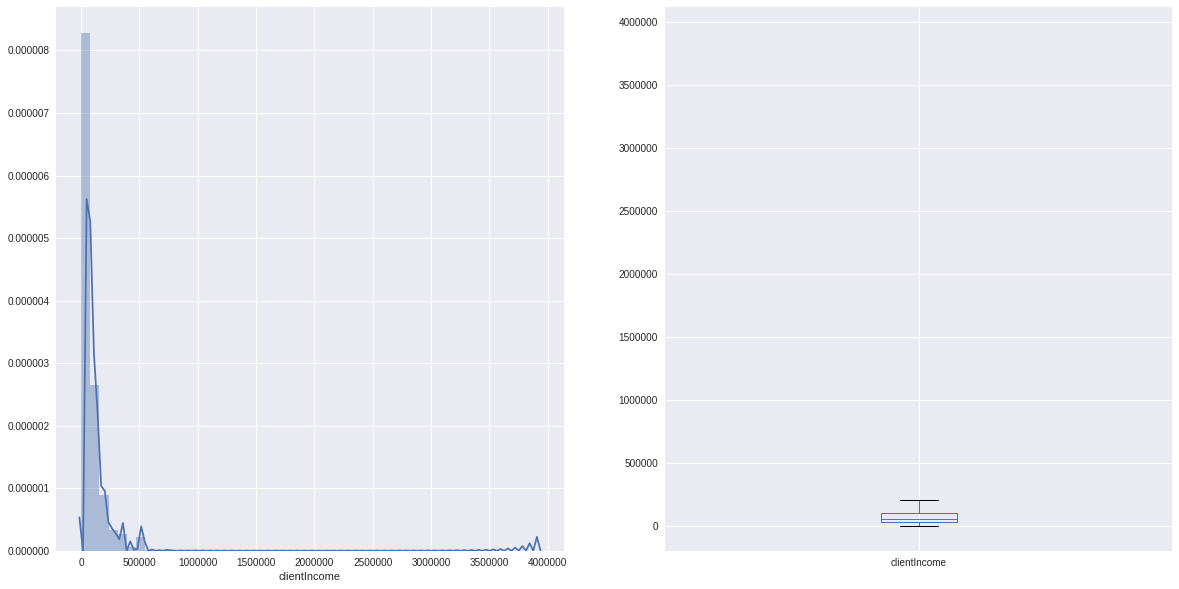

In [0]:
plt.figure(1)
plt.subplot(121)
sns.distplot(EDA_data['clientIncome'])
plt.subplot(122)
EDA_data['clientIncome'].plot.box(figsize = (20, 10))
plt.show()

It can be inferred that most of the data in the distribution of client income is towards left which means it is not normally distributed.
The boxplot confirms the absence of outliers.

Let's look at the **max_amount _taken** Variable

## **Bivariate Analysis**

After looking at some variable individually in univariate analysis, we will now explore them again with respect to the target variable.

### **Categorical Independent Variable vs Target Variable**

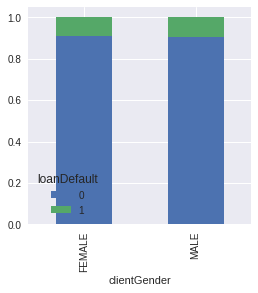

In [0]:
client_gender = pd.crosstab(EDA_data['clientGender'], EDA_data['loanDefault'])
client_gender.div(client_gender.sum(1).astype(float), axis = 0).plot(kind='bar', stacked = True, figsize=(4,4))

It can be inferred that the proportion of male and female applicants is more or less same for both approved and unapproved loans.

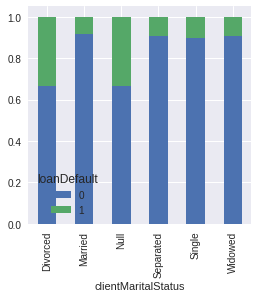

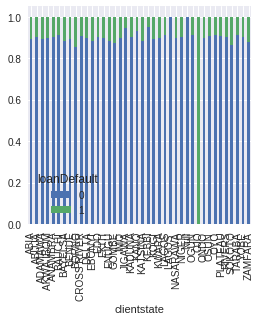

In [0]:
client_marital = pd.crosstab(EDA_data['clientMaritalStatus'], EDA_data['loanDefault'])
client_state = pd.crosstab(EDA_data['clientstate'], EDA_data['loanDefault'])
client_marital.div(client_marital.sum(1).astype(float), axis = 0).plot(kind='bar', stacked = True, figsize=(4,4))
client_state.div(client_state.sum(1).astype(float), axis = 0).plot(kind='bar', stacked = True, figsize=(4,4))
plt.show()

### **Numerical Independent Variable vs Target Variable**

We will try to find the mean income of people for which the loan has been approved vs the mean income of people for which the loan has not been approved.

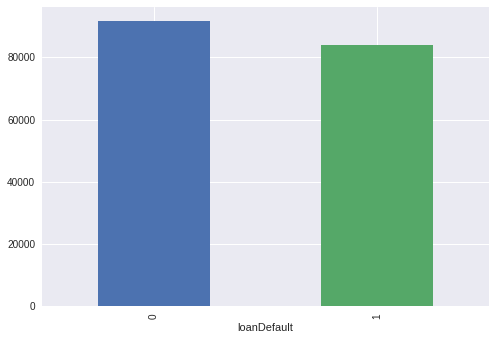

In [0]:
EDA_data.groupby('loanDefault')['clientIncome'].mean().plot.bar()

Interesting!!!!!! We can see that even client with high income have there loan decliened.
let's make bins for the client income variable based on the values in it

Text(0, 0.5, 'Percentage')

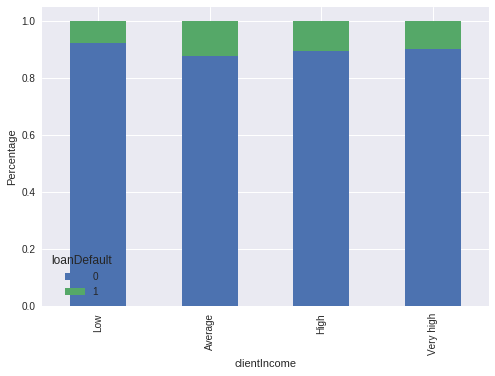

In [0]:
bins=[0,2500,4000,6000,81000]
group=['Low','Average','High', 'Very high']
EDA_data['Income_bin']=pd.cut(EDA_data['clientIncome'],bins,labels=group)
Income_bin=pd.crosstab(EDA_data['Income_bin'],EDA_data['loanDefault'])
Income_bin.div(Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('clientIncome')
plt.ylabel('Percentage')

It can be inferred from here that client income does not affect the chances of loan approval which contradicts our hypothesis in which we assumed that if the applicant income is high the chances of loan approval will also be high.

### Now lets look at the correlation between all the numerical variables. 

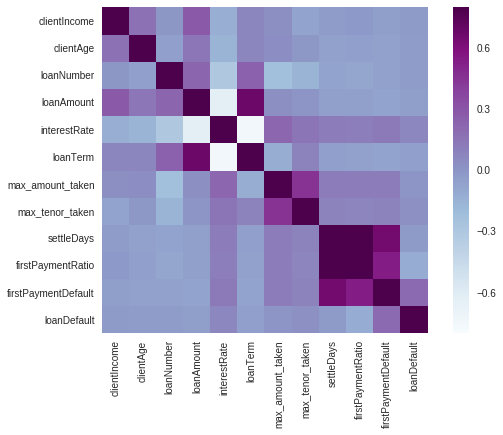

In [0]:
num_corr = EDA_data.corr()
f, ax = plt.subplots(figsize=(9,6))
sns.heatmap(num_corr, vmax = .8, square = True, cmap='BuPu')

We see that the most correlated variables are (clientIncome - LoanAmount), (settleDays - firstPaymentRatio), (loanTerm - loanAmount), (max_amount_taken - max_tenor_taken), and so on.

**The variables with darker color means their correlation is more. **

## **Treating Missing Values**
After exploring the variables in our data, we can now impute the missing values.

In [0]:
final_challenge.isnull().sum()

loanId                       0
clientIncome                 0
incomeVerified               0
clientAge                    0
clientGender                 0
clientMaritalStatus          0
clientstate                  0
clientTimeAtEmployer         0
clientNumberPhoneContacts    0
clientAvgCallsPerDay         0
loanType                     0
loanNumber                   0
applicationDate              0
approvalDate                 0
declinedDate                 0
disbursementDate             0
payout_status                0
loanAmount                   0
interestRate                 0
loanTerm                     0
max_amount_taken             0
max_tenor_taken              0
paidAt                       0
repaidDate                   0
settleDays                   0
firstPaymentRatio            0
firstPaymentDefault          0
loanDefault                  0
dtype: int64

Luckily, our data is clean, and we have no missing values

## **Encoding categorical features**
Machine learning models does not accept texts as the input, hence the need to encode our categorical variable. Here, I have used the sklearn 'LabelEncoder' to encode the categorical variables


In [0]:
label = LabelEncoder()
final_challenge['clientGender'] = label.fit_transform(final_challenge['clientGender'])
final_challenge['clientMaritalStatus'] = label.fit_transform(final_challenge['clientMaritalStatus'])
final_challenge['clientstate'] = label.fit_transform(final_challenge['clientstate'])

I will also be dropping some columns that will not be used in building the model

In [0]:
unused = ['loanId', 'clientTimeAtEmployer', 'loanType', 'clientNumberPhoneContacts', 'applicationDate', 'approvalDate', 'declinedDate', 'disbursementDate', 'payout_status', 'paidAt', 'repaidDate', 'incomeVerified', 'clientAvgCallsPerDay']
final_challenge.drop(unused, axis = 1, inplace = True);

In [0]:
final_challenge.shape

(159596, 15)

### **Replacing Null values with 0 in the new dataframe**

In [0]:
final_challenge.fillna(0);

# **Building the Model (Random Forest)**

## **Specifying the dependent features and the independent features**
Sklearn requires the target variable in a separate dataset. So, we will drop our target variable from the train dataset and save it in another dataset.[link text](https:// [link text](https://))

In [0]:
X = final_challenge.drop(['loanDefault'], axis = 1)

In [0]:
y = final_challenge.loanDefault

# Oversampling with **SMOTE**
Using the SMOTE algorithm to balance our dataset

In [0]:
os = SMOTE(random_state = 0)

**We will use the train _test_split function from sklearn to split our data into training and testing sets**

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
columns = X_train.columns
os_data_X, os_data_y = os.fit_sample(X_train, y_train)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['y'])

In [0]:
#@title We now have a perfectly balanced data { vertical-output: true, display-mode: "form" }
print("length of oversampled data is ",len(os_data_X))
print("Number of no subscription in oversampled data",len(os_data_y[os_data_y['y']==0]))
print("Number of subscription",len(os_data_y[os_data_y['y']==1]))
print("Proportion of no subscription data in oversampled data is ",len(os_data_y[os_data_y['y']==0])/len(os_data_X))
print("Proportion of subscription data in oversampled data is ",len(os_data_y[os_data_y['y']==1])/len(os_data_X))

length of oversampled data is  202764
Number of no subscription in oversampled data 101382
Number of subscription 101382
Proportion of no subscription data in oversampled data is  0.5
Proportion of subscription data in oversampled data is  0.5


## **Implementing the model**

In [0]:
rand_forest_model = sm.Logit(os_data_y, os_data_X)
result = rand_forest_model.fit()
print(result.summary2())

         Current function value: 0.521711
         Iterations: 35
                               Results: Logit
Model:                  Logit               No. Iterations:      35.0000    
Dependent Variable:     y                   Pseudo R-squared:    0.247      
Date:                   2019-04-14 21:08    AIC:                 211596.4460
No. Observations:       202764              BIC:                 211739.5232
Df Model:               13                  Log-Likelihood:      -1.0578e+05
Df Residuals:           202750              LL-Null:             -1.4055e+05
Converged:              0.0000              Scale:               1.0000     
----------------------------------------------------------------------------
                      Coef.    Std.Err.    z     P>|z|    [0.025     0.975] 
----------------------------------------------------------------------------
clientIncome           -0.0000   0.0000  -4.1219 0.0000    -0.0000   -0.0000
clientAge              -0.0153   0.0007 -

**We will be using features with p-value <= 0.05.**
A p-value helps you determine the significance of your results. The lower the p-value (<= 0.05), the better.

In [0]:
cols = ['clientAge', 'clientGender', 'loanNumber', 'loanAmount', 'loanTerm', 'max_amount_taken', 'settleDays', 'firstPaymentDefault', 'max_tenor_taken', 'firstPaymentRatio', 'clientIncome', 'clientstate', 'interestRate']
X_new = os_data_X[cols]
y_new = os_data_y['y']
rand_forest_model = sm.Logit(y, X)
result = rand_forest_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.253642
         Iterations 17
                              Results: Logit
Model:                 Logit               No. Iterations:      17.0000   
Dependent Variable:    loanDefault         Pseudo R-squared:    0.181     
Date:                  2019-04-14 21:09    AIC:                 80988.4056
No. Observations:      159596              BIC:                 81128.1313
Df Model:              13                  Log-Likelihood:      -40480.   
Df Residuals:          159582              LL-Null:             -49446.   
Converged:             1.0000              Scale:               1.0000    
--------------------------------------------------------------------------
                      Coef.   Std.Err.    z     P>|z|    [0.025    0.975] 
--------------------------------------------------------------------------
clientIncome          -0.0000   0.0000  -3.7636 0.0002   -0.0000   -0.0000
clientAge             -0.03

In [0]:
X_NN = X_new.copy()
y_NN = y_new.copy() #Reserved data for Neural Net

In [0]:
X_test_new = X_test[cols]
X_test_NN = X_test_new.copy()


# **Random Forest Model Fitting**

In [0]:
clf = RandomForestClassifier(random_state=1, max_depth=25)
clf.fit(X_new, y_new)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=25, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=1, verbose=0, warm_start=False)

In [0]:
y_predict = clf.predict(X_test_new)
print('Accuracy of Random Forest classifier on test set: {:.2f}'.format(clf.score(X_test_new, y_test)))

Accuracy of Random Forest classifier on test set: 0.90


# **Evaluating the Random Forest Algorithm**

### Confusion **Matrix**

In [0]:
confusion_matrix = confusion_matrix(y_test, y_predict)
print(confusion_matrix)

[[41464  1880]
 [ 3132  1403]]


### **Compute precision, recall, F-measure and support**




In [0]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.93      0.96      0.94     43344
           1       0.43      0.31      0.36      4535

   micro avg       0.90      0.90      0.90     47879
   macro avg       0.68      0.63      0.65     47879
weighted avg       0.88      0.90      0.89     47879



### **Receiver Operating Characteristic (ROC)**

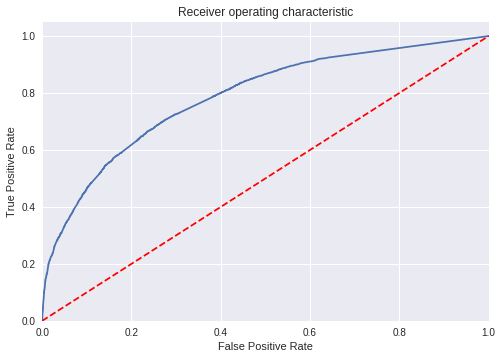

In [0]:
rand_roc_curve = roc_auc_score(y_test, clf.predict(X_test_new))
fpr, tpr, thresholds = roc_curve(y_test, clf.predict_proba(X_test_new)[:,1])
plt.figure()
plt.plot(fpr,tpr)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.savefig('Log_ROC')
plt.show()

# **Model Building 2 (Neural Network)**
For this section, I have used the neural network library from sklearn. This is so that I can perform fair comparison between the two models

To build this model, I will be using the same features I have used in the building of the Random Forest model, But this time, the feature must be scaled.

**Scaling the Dataset**

In [0]:
std = StandardScaler()
X_NN_std = std.fit_transform(X_NN)
X_test_NN_std = std.fit_transform(X_test_NN)

Instantiating Multi Layer Perceptron

In [0]:
mlp = MLPClassifier(hidden_layer_sizes = (100,10), max_iter = 100, alpha = 1)
mlp.fit(X_NN_std, y_NN.values.ravel())

MLPClassifier(activation='relu', alpha=1, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100, 10), learning_rate='constant',
       learning_rate_init=0.001, max_iter=100, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [0]:
pred = mlp.predict(X_test_NN_std)
print('Accuracy of Neural Net: {:.2f}'.format(mlp.score(X_test_NN, y_test.values.ravel())))

Accuracy of Neural Net: 0.91


# **Evaluating the Neural Net Algorithm**

**Confusion Matrix**

In [0]:
confusion_matrix_NN = confusion_matrix(y_test, pred)
print(confusion_matrix_NN)

[[ 9881 33463]
 [  307  4228]]


**precision, recall, F-measure and support**

In [0]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.97      0.23      0.37     43344
           1       0.11      0.93      0.20      4535

   micro avg       0.29      0.29      0.29     47879
   macro avg       0.54      0.58      0.28     47879
weighted avg       0.89      0.29      0.35     47879



**ROC CURVE**

# **Model Comparison (Random Forest Versus Neural Network)**

**Random forest Values**

In [0]:
scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(clf, X_new, y_new, scoring = scoring, cv = 2)
sorted(scores.keys())
clf_fit_time = scores['fit_time'].mean()
clf_score_time = scores['score_time'].mean()
clf_accuracy = scores['test_accuracy'].mean()
clf_precision = scores['test_precision_macro'].mean()
clf_recall = scores['test_recall_macro'].mean()
clf_f1 = scores['test_f1_weighted'].mean()
clf_roc = scores['test_roc_auc'].mean()

**Neural Network Values**

In [0]:
scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores2 = cross_validate(mlp, X_NN_std, y_NN, scoring = scoring, cv = 2)
sorted(scores2.keys())
mlp_fit_time = scores2['fit_time'].mean()
mlp_score_time = scores2['score_time'].mean()
mlp_accuracy = scores2['test_accuracy'].mean()
mlp_precision = scores2['test_precision_macro'].mean()
mlp_recall = scores2['test_recall_macro'].mean()
mlp_f1 = scores2['test_f1_weighted'].mean()
mlp_roc = scores2['test_roc_auc'].mean()

**Comparison**

In [0]:
models = pd.DataFrame({'Model' : ['Random Forest', 'Neural Network'], 'Fitting time':[clf_fit_time, mlp_fit_time], 'Scoring time': [clf_score_time, mlp_score_time], 'Accuracy': [clf_accuracy, mlp_accuracy], 'Precision':[clf_precision, mlp_precision], 'Recall': [clf_recall, mlp_recall], 'F1_score': [clf_f1,mlp_f1], 'AUC_ROC':[clf_roc, mlp_roc]}, columns = ['Model', 'Fitting time', 'Scoring time', 'Accuracy', 'Precision', 'Recall', 'F1_score', 'AUC_ROC']).sort_values(by = 'Accuracy', ascending = False)

# **Final comparison of models**

In [0]:
models

,Model,Fitting time,Scoring time,Accuracy,Precision,Recall,F1_score,AUC_ROC
0,Random Forest,1.622147,1.064474,0.927462,0.932406,0.927462,0.927190,0.976312
1,Neural Network,75.334494,1.680040,0.841836,0.843558,0.841836,0.841628,0.921122
